In [1]:
import ast
import os
from os import chdir
from os.path import basename, join
import cv2
from imutils import grab_contours
import pandas as pd
import numpy as np
import gc
import time
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import tensorflow


from keras.models import Sequential
from keras.layers import Dense, Activation,GlobalAveragePooling2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Model
import cv2

from numpy import save
from numpy import load

from sklearn import metrics

import matplotlib.pyplot as plt
import pickle

Using TensorFlow backend.


In [2]:
liste_animals=["autre","chevreuil","corneille","faisan","lapin","pigeon"]

## Get X and Y

In [4]:
path_to_save='/mnt/VegaSlowDataDisk/c3po_interface_mark/Materiels/4D_Pictures/Alex_db/HSV_Pictures/'
>>> with open(path_to_save+"Y_test_Alex_db.txt", "rb") as fp:   # Unpickling
...   Y_test = pickle.load(fp)

>>> with open(path_to_save+"Y_train_Alex_db.txt", "rb") as fp:   # Unpickling
...   Y_train = pickle.load(fp)


X_test=np.load('/mnt/VegaSlowDataDisk/c3po_interface_mark/Materiels/4D_Pictures/Alex_db/HSV_Pictures/X_test_HSV.dat')
X_train=np.load('/mnt/VegaSlowDataDisk/c3po_interface_mark/Materiels/4D_Pictures/Alex_db/HSV_Pictures/X_train_HSV.dat')

In [5]:
X=np.concatenate((X_train,X_test),axis=0)
Y=Y_train+Y_test

## ADD FP 

In [6]:
fp_path="/mnt/VegaSlowDataDisk/c3po_interface_mark/Materiels/4D_Pictures/FP/Neurone_name/dossier0/"
list_of_list_fp=os.listdir(fp_path)
liste_fp=[]
for fp in list_of_list_fp:
    with open(fp_path+fp, "rb") as fp:   # Unpickling
        liste1fp = pickle.load(fp)
    liste_fp=liste_fp+liste1fp


array_fp=np.array(liste_fp)

X=np.concatenate((array_fp, X), axis=0)
y_to_add = [0] * len(array_fp)
Y=y_to_add+Y

## Get animals

In [8]:
corbeaux_liste,pigeons_liste,faisans_liste,lapins_liste,chevreuils_liste=([] for i in range(5))

liste_animals=os.listdir("/mnt/VegaSlowDataDisk/c3po_interface_mark/Materiels/4D_Pictures/animals_match/dossier0/")

                         
for image in liste_animals:
    if image.split("_")[-1]=="corbeau.txt":
        corbeaux_liste.append(image)
    if image.split("_")[-1]=="pigeon.txt":
        pigeons_liste.append(image)
    if image.split("_")[-1]=="faisan.txt":
        faisans_liste.append(image)        
    if image.split("_")[-1]=="lapin.txt":
        lapins_liste.append(image)        
    if image.split("_")[-1]=="chevreuil.txt":
        chevreuils_liste.append(image)        

In [10]:
fp_path="/mnt/VegaSlowDataDisk/c3po_interface_mark/Materiels/4D_Pictures/FP/Neurone_name/dossier0/"

#liste_fp=["image_2019-04-18_18-40-08__fp.txt","image_2019-04-18_18-49-53__fp.txt"]
animals_paths="/mnt/VegaSlowDataDisk/c3po_interface_mark/Materiels/4D_Pictures/animals_match/dossier0/"


liste_array_corbeaux=add_list(corbeaux_liste,animals_paths)
liste_array_pigeons=add_list(pigeons_liste,animals_paths)
liste_array_faisans=add_list(faisans_liste,animals_paths)
liste_array_lapins=add_list(lapins_liste,animals_paths)
liste_array_chevreuils=add_list(chevreuils_liste,animals_paths)

## Get train and test sets

In [11]:

#concatenate_X_Y(X,Y,category,liste_array)



map_listes_names={"pigeon":[liste_array_pigeons,5],"corbeau":[liste_array_corbeaux,2],"chevreuil":[liste_array_chevreuils,1],
                     "faisan":[liste_array_faisans,3],"lapin":[liste_array_lapins,4]}

for animal in map_listes_names.keys():
    category=map_listes_names[animal][1]
    liste_array=map_listes_names[animal][0]
    X,Y=concatenate_X_Y(X,Y,category,liste_array)


In [12]:
indices=list(range(len(Y)))
Y_train,Y_test,indices_train,indices_test=train_test_split(Y,indices,stratify=Y,test_size=0.2,random_state=42)

X_train=[X[i] for i in indices_train]
X_test=[X[i] for i in indices_test]

X_train=np.array(X_train)
X_test=np.array(X_test)

## Train_models

              precision    recall  f1-score   support

           0    0.99616   0.99340   0.99478     15151
           1    0.82243   0.83019   0.82629       106
           2    0.96947   0.89858   0.93268       848
           3    0.81081   0.97222   0.88421       216
           4    0.81618   0.82222   0.81919       135
           5    0.83433   0.94570   0.88653       442

    accuracy                        0.98473     16898
   macro avg    0.87490   0.91039   0.89061     16898
weighted avg    0.98569   0.98473   0.98496     16898



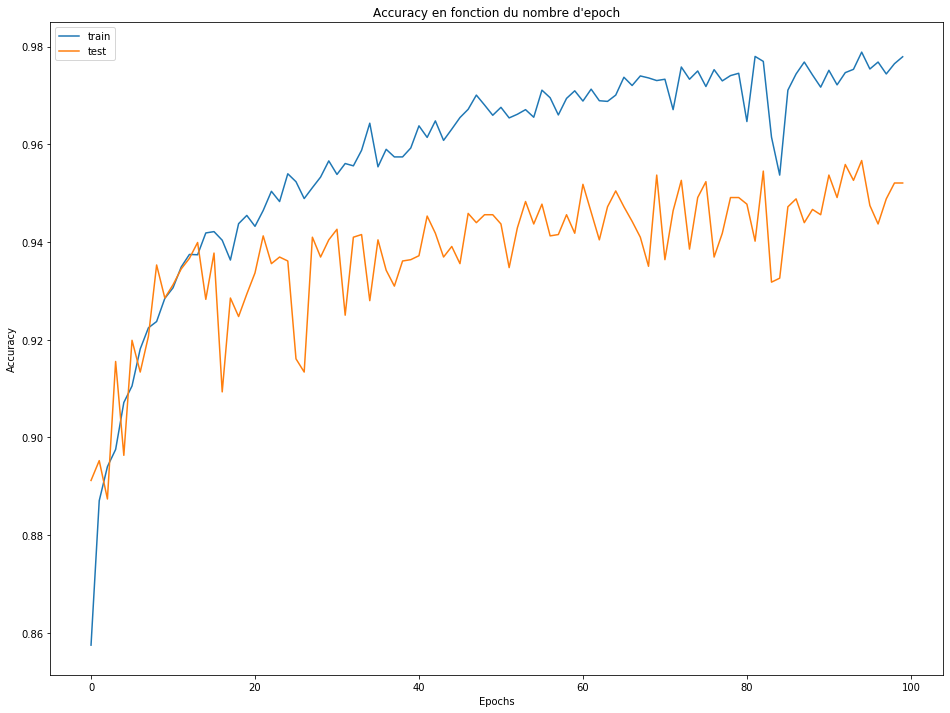

In [182]:
lenet=nn(0.1)
#seed(1)
tensorflow.random.set_seed(2)
#history=lenet.fit(X_train,Y_train,epochs=2,verbose=1)
history=lenet.fit(X_train,Y_train,validation_data=(X_test, Y_test),  epochs=100,verbose=0)


plt.figure(figsize=(16,12))

plt.plot(history.history['accuracy'],label="train");
plt.plot(history.history['val_accuracy'],label="test");
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy en fonction du nombre d'epoch");
plt.legend();


Y_predict=lenet.predict(X_train_new).argmax(axis=1)
print(metrics.classification_report(Y_predict,Y_train_new,digits=5))


In [183]:
model_path_to_save="/mnt/VegaSlowDataDisk/c3po_interface_mark/Materiels/Models/4Chanels_6Classes/birds_fp_matched/"
lenet.save(model_path_to_save+'100ep_0.1dpt_HSV_6CL_4CH_smal_fp_birds_matched')
#concatenate_X_Y(X_train,Y_train,2,corbeaux_liste)


              precision    recall  f1-score   support

           0    0.99504   0.98817   0.99159     15214
           1    0.65421   0.85366   0.74074        82
           2    0.92621   0.96169   0.94362       757
           3    0.88031   0.89062   0.88544       256
           4    0.72059   0.91589   0.80658       107
           5    0.83433   0.86722   0.85046       482

    accuracy                        0.98094     16898
   macro avg    0.83511   0.91288   0.86974     16898
weighted avg    0.98224   0.98094   0.98142     16898



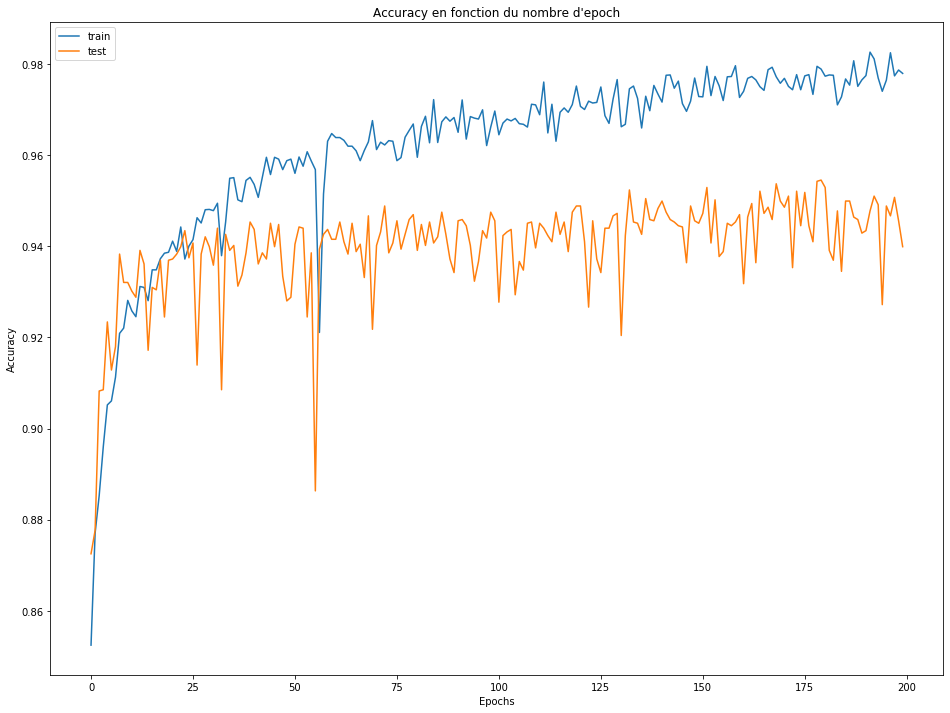

In [187]:
lenet=nn(0.1)
#seed(1)
tensorflow.random.set_seed(2)
#history=lenet.fit(X_train,Y_train,epochs=2,verbose=1)
history=lenet.fit(X_train,Y_train,validation_data=(X_test, Y_test),  epochs=200,verbose=0)


plt.figure(figsize=(16,12))

plt.plot(history.history['accuracy'],label="train");
plt.plot(history.history['val_accuracy'],label="test");
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy en fonction du nombre d'epoch");
plt.legend();


Y_predict=lenet.predict(X_train_new).argmax(axis=1)
print(metrics.classification_report(Y_predict,Y_train_new,digits=5))

model_path_to_save="/mnt/VegaSlowDataDisk/c3po_interface_mark/Materiels/Models/4Chanels_6Classes/birds_fp_matched/"
lenet.save(model_path_to_save+'200ep_0.1dpt_HSV_6CL_4CH_smal_fp_birds_matched_bis')
#concatenate_X_Y(X_train,Y_train,2,corbeaux_liste)



              precision    recall  f1-score   support

           0    0.99662   0.99531   0.99597     15129
           1    0.88785   0.90476   0.89623       105
           2    0.98346   0.95314   0.96807       811
           3    0.91506   0.96341   0.93861       246
           4    0.86029   0.87313   0.86667       134
           5    0.88224   0.93446   0.90760       473

    accuracy                        0.98958     16898
   macro avg    0.92092   0.93737   0.92886     16898
weighted avg    0.98985   0.98958   0.98967     16898



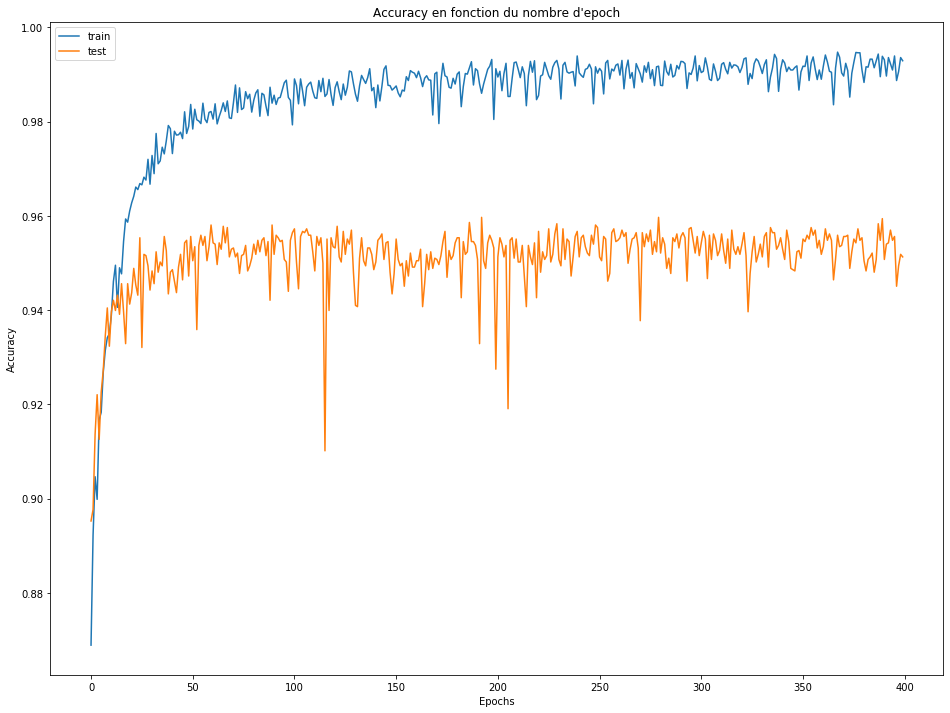

In [188]:
lenet=nn(0.1)
#seed(1)
tensorflow.random.set_seed(2)
#history=lenet.fit(X_train,Y_train,epochs=2,verbose=1)
history=lenet.fit(X_train,Y_train,validation_data=(X_test, Y_test),  epochs=400,verbose=0)


plt.figure(figsize=(16,12))

plt.plot(history.history['accuracy'],label="train");
plt.plot(history.history['val_accuracy'],label="test");
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy en fonction du nombre d'epoch");
plt.legend();


Y_predict=lenet.predict(X_train_new).argmax(axis=1)
print(metrics.classification_report(Y_predict,Y_train_new,digits=5))

model_path_to_save="/mnt/VegaSlowDataDisk/c3po_interface_mark/Materiels/Models/4Chanels_6Classes/birds_fp_matched/"
lenet.save(model_path_to_save+'400ep_0.1dpt_HSV_6CL_4CH_smal_fp_birds_matched')
#concatenate_X_Y(X_train,Y_train,2,corbeaux_liste)



              precision    recall  f1-score   support

           0    0.99629   0.99124   0.99376     15186
           1    0.82243   0.86275   0.84211       102
           2    0.94911   0.96258   0.95580       775
           3    0.84942   0.94421   0.89431       233
           4    0.79412   0.94737   0.86400       114
           5    0.87425   0.89754   0.88574       488

    accuracy                        0.98550     16898
   macro avg    0.88094   0.93428   0.90595     16898
weighted avg    0.98617   0.98550   0.98574     16898



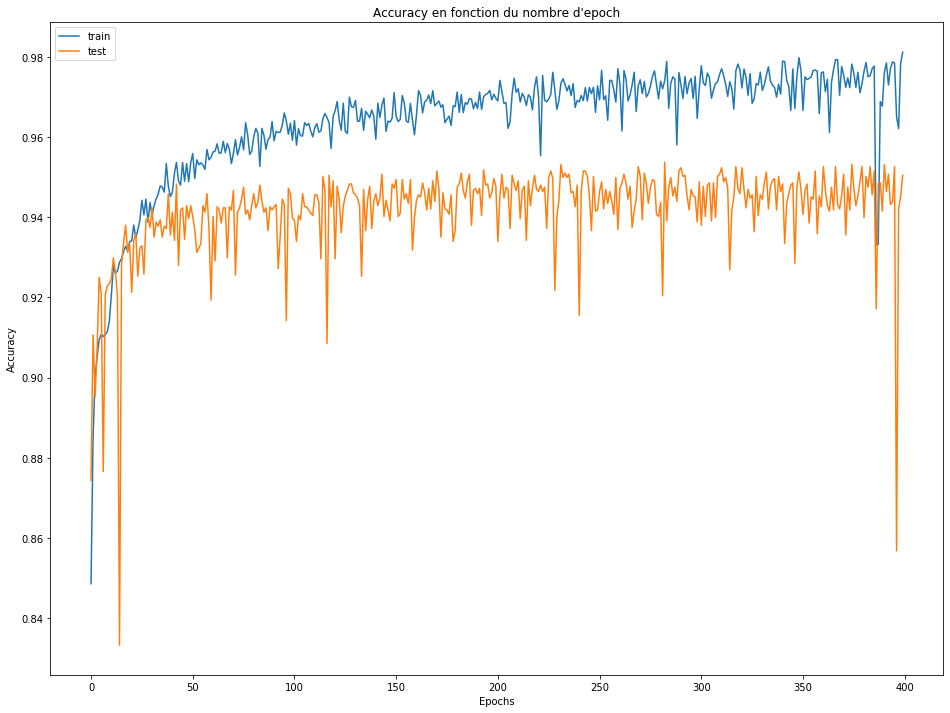

In [189]:
lenet=nn(0.1)
#seed(1)
tensorflow.random.set_seed(2)
#history=lenet.fit(X_train,Y_train,epochs=2,verbose=1)
history=lenet.fit(X_train,Y_train,validation_data=(X_test, Y_test),  epochs=400,verbose=0)


plt.figure(figsize=(16,12))

plt.plot(history.history['accuracy'],label="train");
plt.plot(history.history['val_accuracy'],label="test");
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy en fonction du nombre d'epoch");
plt.legend();


Y_predict=lenet.predict(X_train_new).argmax(axis=1)
print(metrics.classification_report(Y_predict,Y_train_new,digits=5))

model_path_to_save="/mnt/VegaSlowDataDisk/c3po_interface_mark/Materiels/Models/4Chanels_6Classes/birds_fp_matched/"
lenet.save(model_path_to_save+'400ep_0.1dpt_HSV_6CL_4CH_smal_fp_birds_matched_bis')
#concatenate_X_Y(X_train,Y_train,2,corbeaux_liste)

